In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
ny_crime = pd.read_excel('crime_in_ny_state.xls', header=4, nrows=348)
ny_crime = ny_crime.rename(columns= {'City':'city', 'Population':'pop', 
                          'Violent\ncrime':'violent_crime', 
                          'Murder and\nnonnegligent\nmanslaughter': 'murder',
                          'Rape\n(revised\ndefinition)1': 'rape_new',
                          'Rape\n(legacy\ndefinition)2': 'rape_old', 
                          'Robbery': 'robbery', 
                          'Aggravated\nassault': 'assault', 
                          'Property\ncrime': 'property_crime', 
                          'Burglary': 'burglary', 
                          'Larceny-\ntheft': 'larceny', 
                          'Motor\nvehicle\ntheft':'vehicle_theft', 
                          'Arson3':'arson'})

In [3]:
ny_crime_no_ny = ny_crime.loc[ny_crime.murder < 300, ]

In [4]:
ny_crime_no_ny.head()

,city,pop,violent_crime,murder,rape_new,rape_old,robbery,assault,property_crime,burglary,larceny,vehicle_theft,arson
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [5]:
features = pd.DataFrame()
features['pop'] = ny_crime_no_ny['pop']
features['murder_cat'] = np.where(ny_crime_no_ny['murder'] >0, 1, 0)
features['robbery_cat'] = np.where(ny_crime_no_ny['robbery'] >0, 1, 0)
features['rape'] = ny_crime_no_ny['rape_old']
features['assault'] = ny_crime_no_ny['assault']


## Model 1 - Murder, Robbery and Rape

In [6]:
regr_1 = linear_model.LinearRegression()
Y_1 = ny_crime_no_ny['property_crime'].values.reshape(-1, 1)
X_1 = features[['murder_cat', 'robbery_cat', 'rape']]

#### Overall

In [7]:
regr_1.fit(X_1, Y_1)
regr_1.score(X_1, Y_1)

0.9103158817754645

#### Cross validation

In [8]:
r_sq_1 = cross_val_score(regr_1, X_1, Y_1, cv=5, scoring='explained_variance')
print('R-squareds: ', r_sq_1)
print('Mean: ', np.mean(r_sq_1))

R-squareds:  [0.93330734 0.49402076 0.48078547 0.89270774 0.94566537]
Mean:  0.7492973349359011


#### Calculate again using statsmodels

In [9]:
features['prop_crime'] = ny_crime_no_ny['property_crime']

In [10]:
linear_model_1 = 'prop_crime ~ murder_cat+robbery_cat+rape'

lm_1 = smf.ols(formula=linear_model_1, data=features).fit()

In [11]:
lm_1.rsquared ## Should be same as overall

0.9103158817754646

In [12]:
lm_1.pvalues

Intercept       2.585257e-01
murder_cat      5.400710e-03
robbery_cat     5.883712e-06
rape           1.232519e-163
dtype: float64

Intercept is not statistically significant.

## Model 2 - Murder, Robbery and Assault

In [13]:
regr_2 = linear_model.LinearRegression()
Y_2 = ny_crime_no_ny['property_crime'].values.reshape(-1, 1)
X_2 = features[['murder_cat', 'robbery_cat', 'assault']]

#### Overall

In [14]:
regr_2.fit(X_2, Y_2)
regr_2.score(X_2, Y_2)

0.8984655801628051

#### Cross validation

In [15]:
r_sq_2 = cross_val_score(regr_2, X_2, Y_2, cv=5, scoring='explained_variance')
print('R-squareds: ', r_sq_2)
print('Mean: ', np.mean(r_sq_2))

R-squareds:  [0.93932668 0.5413865  0.43857311 0.90160724 0.83289244]
Mean:  0.7307571915282283


#### Calculate again using statsmodels

In [16]:
linear_formula_2 = 'prop_crime ~ murder_cat+robbery_cat+assault'
lm_2 = smf.ols(formula=linear_formula_2, data = features).fit()

In [17]:
lm_2.rsquared

0.898465580162805

In [18]:
lm_2.pvalues

Intercept       2.828603e-01
murder_cat      1.559155e-01
robbery_cat     1.288357e-07
assault        2.177542e-154
dtype: float64

Intercept and murder are not statistically significant this time.

## Model 3 - Murder, Robbery and Population

In [19]:
regr_3 = linear_model.LinearRegression()
Y_3 = ny_crime_no_ny['property_crime'].values.reshape(-1, 1)
X_3 = features[['murder_cat', 'robbery_cat', 'pop']]

#### Overall

In [20]:
regr_3.fit(X_3, Y_3)
regr_3.score(X_3, Y_3)

0.7889428000907828

#### Cross validation

In [21]:
r_sq_3 = cross_val_score(regr_3, X_3, Y_3, cv=5, scoring='explained_variance')
print('R-squareds: ', r_sq_3)
print('Mean: ', np.mean(r_sq_3))

R-squareds:  [0.82903036 0.44692663 0.40281642 0.80032172 0.46571   ]
Mean:  0.5889610249048312


#### Calculate using statsmodels

In [22]:
linear_formula_3 = 'prop_crime ~ murder_cat+robbery_cat+pop'

lm_3 = smf.ols(formula=linear_formula_3, data=features).fit()

In [23]:
lm_3.rsquared

0.7889428000907828

In [24]:
lm_3.pvalues

Intercept       8.205933e-03
murder_cat      8.692678e-01
robbery_cat     9.624259e-02
pop            7.517475e-100
dtype: float64

Neither murder_cat or robbery_cat are statistically significant in this model.

## Conclusions from cross validation

Model 1 performs the best in terms of explained variance, both overall and through cross validation. It also has the most statistically significant terms. This model is therefore the one chosen to move onto the next stage - validation against another data set.

## Validation on another data set - 2014 (original = 2013)

In [25]:
ny_crime_2014 = pd.read_excel('crime_in_ny_state_2014.xls', header=4, nrows=369)

In [26]:
ny_crime_2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851,0,0,NaN,0.0,0,0,11.0,1,10.0,0,0.0
1,Addison Town and Village,2568,2,0,NaN,0.0,1,1,49.0,1,47.0,1,0.0
2,Afton Village4,820,0,0,0.0,NaN,0,0,1.0,0,1.0,0,0.0
3,Akron Village,2842,1,0,NaN,0.0,0,1,17.0,0,17.0,0,0.0
4,Albany4,98595,802,8,54.0,NaN,237,503,3888.0,683,3083.0,122,12.0


In [27]:
ny_crime_2014.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
364,"Woodbury Town4, 5",10739,4,0,0.0,NaN,1,3,NaN,5,NaN,0,0.0
365,Woodstock Town4,5907,3,0,1.0,NaN,2,0,43.0,14,29.0,0,0.0
366,Yonkers4,200624,974,3,33.0,NaN,358,580,2009.0,414,1395.0,200,15.0
367,Yorktown Town4,36989,13,0,0.0,NaN,0,13,209.0,24,182.0,3,0.0
368,Youngstown Village4,1896,0,0,0.0,NaN,0,0,1.0,0,1.0,0,0.0


Unfortunately the rape definition has changed meaning the new data may not be modeled as well by the chosen model. However, I will assume the changes are minimal and proceed to validate model 1.

### Check and clean validation dataset

In [28]:
ny_crime_2014 = ny_crime_2014.rename(columns= {'City':'city', 'Population':'pop', 
                          'Violent\ncrime':'violent_crime', 
                          'Murder and\nnonnegligent\nmanslaughter': 'murder',
                          'Rape\n(revised\ndefinition)1': 'rape_new',
                          'Rape\n(legacy\ndefinition)2': 'rape_old', 
                          'Robbery': 'robbery', 
                          'Aggravated\nassault': 'assault', 
                          'Property\ncrime': 'property_crime', 
                          'Burglary': 'burglary', 
                          'Larceny-\ntheft': 'larceny', 
                          'Motor\nvehicle\ntheft':'vehicle_theft', 
                          'Arson3':'arson'})

In [29]:
ny_crime_2014.columns

Index(['city', 'pop', 'violent_crime', 'murder', 'rape_new', 'rape_old',
       'robbery', 'assault', 'property_crime', 'burglary', 'larceny',
       'vehicle_theft', 'arson'],
      dtype='object')

In [30]:
sum(np.isnan(ny_crime_2014['property_crime']))

1

In [31]:
ny_crime_2014.loc[np.isnan(ny_crime_2014['property_crime']),]

,city,pop,violent_crime,murder,rape_new,rape_old,robbery,assault,property_crime,burglary,larceny,vehicle_theft,arson
364,"Woodbury Town4, 5",10739,4,0,0.0,NaN,1,3,NaN,5,NaN,0,0.0


In [32]:
## Cannot predict if no outcome value so drop

ny_crime_2014.drop(364, axis=0, inplace=True)
ny_crime_2014.reset_index(inplace=True)
ny_crime_2014.loc[np.isnan(ny_crime_2014['property_crime']),]

,index,city,pop,violent_crime,murder,rape_new,rape_old,robbery,assault,property_crime,burglary,larceny,vehicle_theft,arson


In [33]:
features_2014 = pd.DataFrame()
features_2014['prop_crime'] = ny_crime_2014['property_crime']

In [34]:
ny_crime_2014.rape_old.unique()

array([ 0., nan,  1.])

In [35]:
ny_crime_2014.rape_new.unique()

array([     nan, 0.00e+00, 5.40e+01, 3.00e+00, 1.00e+00, 1.60e+01,
       1.70e+01, 7.00e+00, 4.90e+01, 4.00e+00, 1.74e+02, 1.80e+01,
       2.00e+00, 2.50e+01, 1.30e+01, 5.00e+00, 9.00e+00, 8.00e+00,
       3.40e+01, 6.00e+00, 4.30e+01, 2.90e+01, 1.00e+01, 1.40e+01,
       1.10e+01, 2.19e+03, 2.60e+01, 1.20e+01, 2.70e+01, 1.90e+02,
       5.70e+01, 7.00e+01, 3.50e+01, 4.70e+01, 3.30e+01])

In [36]:
ny_crime_2014.loc[np.isnan(ny_crime_2014['rape_old']),'rape_new'].unique()

array([0.00e+00, 5.40e+01, 3.00e+00, 1.00e+00, 1.60e+01, 1.70e+01,
       7.00e+00, 4.90e+01, 4.00e+00, 1.74e+02, 1.80e+01, 2.00e+00,
       2.50e+01, 1.30e+01, 5.00e+00, 9.00e+00, 8.00e+00, 3.40e+01,
       6.00e+00, 4.30e+01, 2.90e+01, 1.00e+01, 1.40e+01, 1.10e+01,
       2.19e+03, 2.60e+01, 1.20e+01, 2.70e+01, 1.90e+02, 5.70e+01,
       7.00e+01, 3.50e+01, 4.70e+01, 3.30e+01])

In [37]:
features_2014['rape'] = np.where(np.isnan(ny_crime_2014['rape_old']), ny_crime_2014['rape_new'], ny_crime_2014['rape_old'])

In [38]:
sum(np.isnan(ny_crime_2014['murder']))

0

In [39]:
sum(np.isnan(ny_crime_2014['robbery']))

0

In [40]:
features_2014['murder_cat'] = np.where(ny_crime_2014['murder'] > 0, 1, 0)
features_2014['robbery_cat'] = np.where(ny_crime_2014['robbery'] > 0, 1, 0)

In [41]:
features_2014.head()

,prop_crime,rape,murder_cat,robbery_cat
0,11.0,0.0,0,0
1,49.0,0.0,0,1
2,1.0,0.0,0,0
3,17.0,0.0,0,0
4,3888.0,54.0,1,1


In [42]:
sum(np.isnan(features_2014.any()))

0

### Validation testing

In [43]:
X_2014 = features_2014[['murder_cat', 'robbery_cat', 'rape']]
Y_2014 = features_2014['prop_crime'].values.reshape(-1, 1)

regr_1.score(X_2014, Y_2014)

0.8162598472019031

In [44]:
## Check r-squared
y_pred_2014 = lm_1.predict(X_2014)
residuals_2014 = np.array(y_pred_2014) - features_2014['prop_crime']
residuals_2014_sq = residuals_2014**2
sse = sum(residuals_2014_sq)
mean_2014 = np.mean(features_2014['prop_crime'])
diffs_2014 = features_2014['prop_crime'] - mean_2014
diffs_2014_sq = diffs_2014**2
total_sum_sqs = sum(diffs_2014_sq)
1-(sse/total_sum_sqs)

0.8162598472019011

#### Check residuals

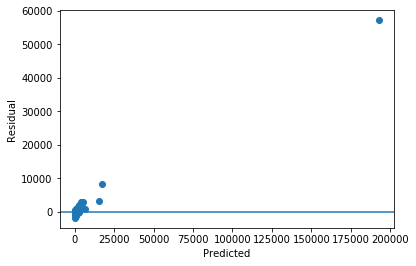

In [45]:
plt.scatter(y_pred_2014, residuals_2014)
plt.axhline(y=0)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

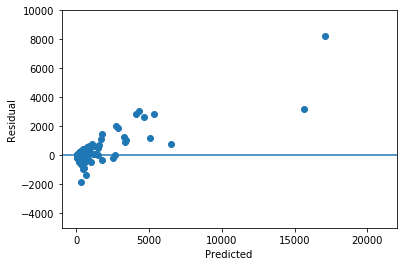

In [46]:
## Remove largest point so can see graph

plt.scatter(y_pred_2014, residuals_2014)
plt.ylim(-5000, 10000)
plt.xlim(-1000, 22000)
plt.axhline(y=0)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

Predictions get much worse at higher end.

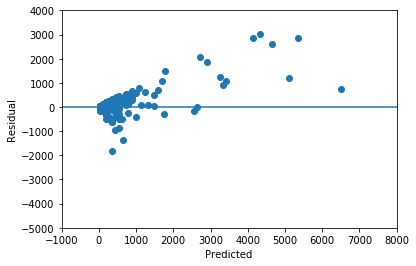

In [47]:
## Remove more higher points.

plt.scatter(y_pred_2014, residuals_2014)
plt.ylim(-5000, 4000)
plt.xlim(-1000, 8000)
plt.axhline(y=0)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

Definitely under-predicts as values increase.

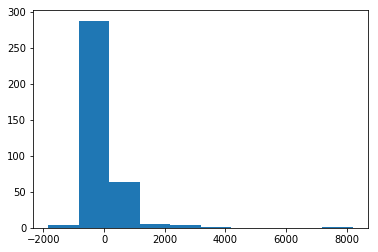

In [48]:
plt.hist(residuals_2014.loc[residuals_2014<20000])
plt.show()

This is skewed.<br>

It looks like it could be a squared relationship. I will try including a square. <br>

## Adjust original model to include a square

#### Create new feature and new model

In [49]:
features['rape_sq'] = features['rape']**2

In [50]:
regr_4 = linear_model.LinearRegression()
X_4 = features[['murder_cat', 'robbery_cat', 'rape_sq']]
Y_4 = features['prop_crime'].values.reshape(-1, 1)
regr_4.fit(X_4, Y_4)
regr_4.score(X_4, Y_4)

0.8062428078158009

#### Cross validate model

In [51]:
r_sq_4 = cross_val_score(regr_4, X_4, Y_4, cv=5, scoring='explained_variance')
print('R-squareds: ', r_sq_4)
print('Mean: ', np.mean(r_sq_4))

R-squareds:  [ 0.17322919 -0.00292909  0.60556378  0.76664623  0.76390731]
Mean:  0.4612834814985602


Wow this is variable.

#### Test on validation dataset

In [52]:
features_2014['rape_sq'] = features_2014['rape']**2
X_2014_4 = features_2014[['murder_cat', 'robbery_cat', 'rape_sq']]
regr_4.score(X_2014_4, Y_2014)

-480.4963891143222

This is terrible!

#### Try with population instead

In [53]:
features['pop_sq'] = ny_crime_no_ny['pop']**2
features['pop'] = ny_crime_no_ny['pop']

In [54]:
regr_5 = linear_model.LinearRegression()
X_5 = features[['murder_cat', 'robbery_cat', 'pop_sq', 'pop']]
Y_5 = features['prop_crime'].values.reshape(-1, 1)
regr_5.fit(X_5, Y_5)
regr_5.score(X_5, Y_5)

0.8444937611173489

In [55]:
features_2014['pop_sq'] = ny_crime_2014['pop']**2
features_2014['pop'] = ny_crime_2014['pop']
X_2014_5 = features_2014[['murder_cat', 'robbery_cat', 'pop_sq', 'pop']]
regr_5.score(X_2014_5, Y_2014)

-3632.770497093291

Even more terrible.

## Conclusions from new dataset validation

Squared relationships are not the way to go - the models perform terribly on new datasets.